# TQC 人工智慧 機器學習 證照 攻略(下)
## 第三類機器學習應用 解題分享 (3/5)

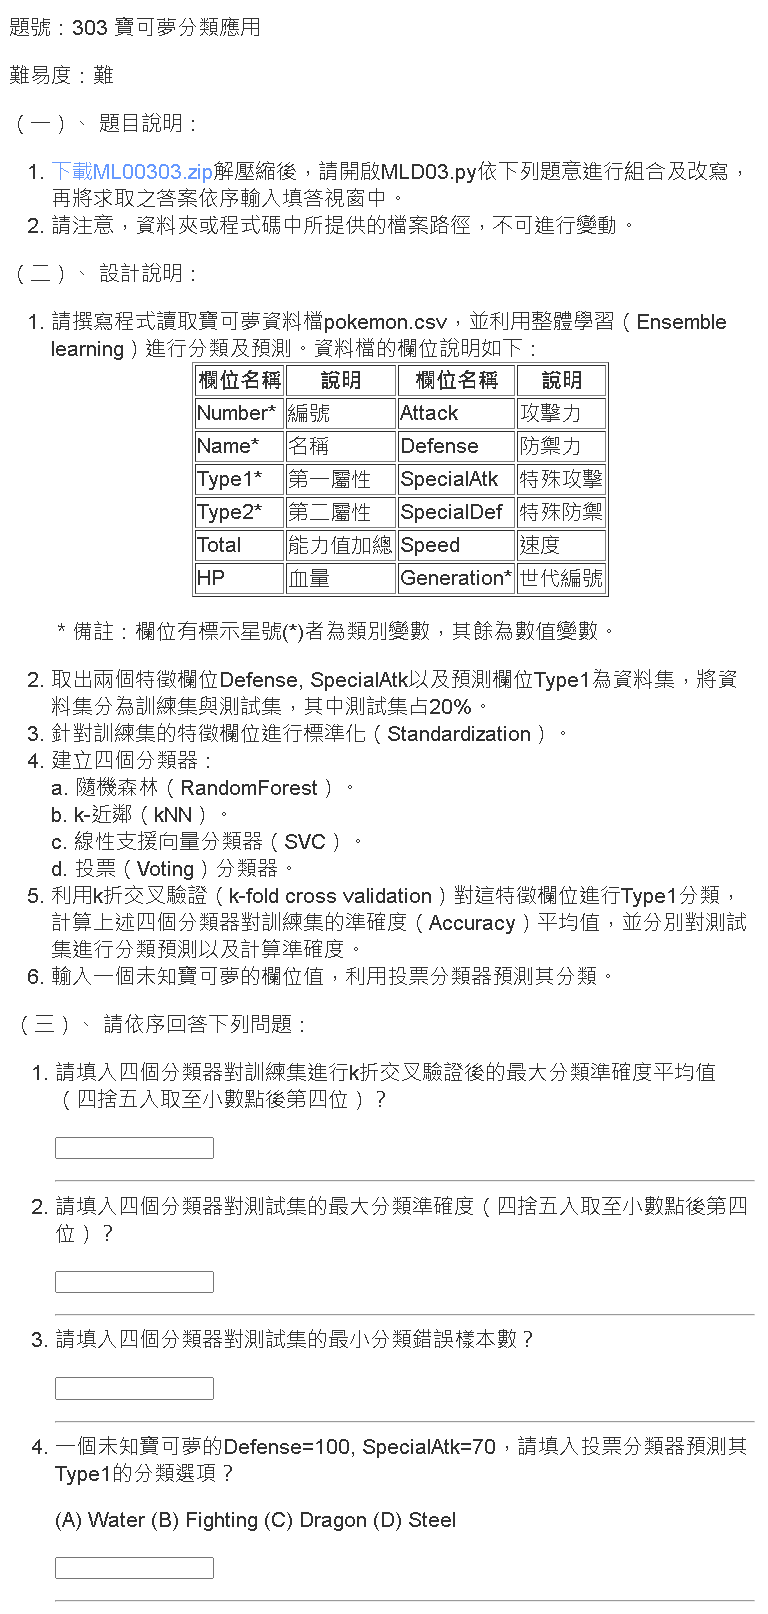

In [1]:
# #############################################################################
# 本題參數設定，請勿更改
seed = 0    # 亂數種子數
# #############################################################################
import pandas as pd
# 載入寶可夢資料
data = pd.read_csv('pokemon.csv')
# 取出目標欄位
X = data.loc[:, ['Defense', 'SpecialAtk']]
y = data.loc[:, 'Type1']
# 編碼 Type1
from sklearn import preprocessing
le = preprocessing.LabelEncoder().fit(y)
y = le.transform(y)
# 切分訓練集、測試集，除以下參數設定外，其餘為預設值
# #########################################################################
# X, y, test_size=0.2, random_state=seed
# #########################################################################
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)
# 特徵標準化
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler().fit(X_train)
X_train = scalar.transform(X_train)
# 訓練集
# 分別建立 RandomForest, kNN, SVC, Voting，除以下參數設定外，其餘為預設值
# #############################################################################
# RandomForest: n_estimators=10, random_state=seed
# kNN: n_neighbors=4
# SVC: gamma=.1, kernel='rbf', probability=True
# Voting: estimators=[('RF', clf1), ('kNN', clf2), ('SVC', clf3)], 
#         voting='hard', n_jobs=-1
# #############################################################################    
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
clf1 = RandomForestClassifier(n_estimators=10, random_state=seed)
clf2 = KNeighborsClassifier(n_neighbors=4)
clf3 = SVC(gamma=.1, kernel='rbf', probability=True)
vclf = VotingClassifier(estimators=[('RF', clf1), ('kNN', clf2), ('SVC', clf3)],
                        voting='hard', n_jobs=-1)
name_list = ['RF', 'kNN', 'SVC', 'Voting']
model_list = [clf1, clf2, clf3, vclf]

# 建立函式 kfold_cross_validation() 執行 k 折交叉驗證，並回傳準確度的平均值
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import KFold, cross_val_score
def kfold_cross_validation(scalar, model):
    """ 函式描述：執行 k 折交叉驗證
    參數：
        scalar (StandardScaler):標準化適配的結果
        model: 機器學習模型

    回傳：
        k 折交叉驗證的準確度(accuracy)平均值
    """
    # 建立管線，用來進行(標準化 -> 機器學習模型)
    pipeline = make_pipeline(scalar, model)
    
    # 產生 k 折交叉驗證，除以下參數設定外，其餘為預設值
    # #########################################################################
    # n_splits=5, shuffle=True, random_state=seed
    # #########################################################################
    kf = KFold(n_splits=5, shuffle=True, random_state=seed)
    
    # 執行 k 折交叉驗證
    # #########################################################################
    # pipeline, X_train, y_train, cv=kf, scoring='accuracy', n_jobs=-1
    # #########################################################################
    cv_result = cross_val_score(pipeline, X_train, y_train, cv=kf, scoring='accuracy', n_jobs=-1)
    
    return  cv_result
# 利用 kfold_cross_validation()，分別讓分類器執行 k 折交叉驗證，計算準確度(accuracy)
print("===== 訓練集 ======")
for name, model in zip(name_list, model_list):
    model.fit(X_train, y_train)
    accuracy = kfold_cross_validation(scalar, model)
    print(f"{name}\n\t"
          f"accuracy = {accuracy.mean():.4f}")
# #############################################################################
# 利用訓練集的標準化結果，針對測試集進行標準化
X_test = scalar.transform(X_test)
# 上述分類器針對測試集進行預測，並計算分類錯誤的個數與準確度
from sklearn.metrics import accuracy_score
print("===== 測試集 ======")
for name, model in zip(name_list, model_list):
    accuracy = accuracy_score(y_test, model.predict(X_test))
    error_num = (y_test!= model.predict(X_test)).sum()
    print(f"{name}\n\t"
          f"accuracy = {accuracy:.4f}\n\t"
          f"錯誤樣本數: {error_num}")
# #############################################################################
# 分別利用上述分類器預測分類
print("===== 預測分類 ======")
inp = scalar.transform([[100, 70]])
inp_pred = vclf.predict(inp)
print(f"Voting預測分類: {le.inverse_transform(inp_pred)[0]}")

===== 訓練集 ======
RF
	accuracy = 0.5293
kNN
	accuracy = 0.4957
SVC
	accuracy = 0.5630
Voting
	accuracy = 0.5547
===== 測試集 ======
RF
	accuracy = 0.5333
	錯誤樣本數: 14
kNN
	accuracy = 0.5333
	錯誤樣本數: 14
SVC
	accuracy = 0.5000
	錯誤樣本數: 15
Voting
	accuracy = 0.5667
	錯誤樣本數: 13
===== 預測分類 ======
Voting預測分類: Water
